## Deep Learning Challenge

### Loading the CIFAR10 data
The data can be found directly in the package keras (`keras.datasets.cifar10`).

```python
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
```

In [74]:
from keras import backend
print(backend.tensorflow_backend._get_available_gpus())

AttributeError: module 'keras.backend' has no attribute 'tensorflow_backend'

In [2]:
from tensorflow.keras.datasets import cifar10
import keras

In [12]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

### Task
Build the neural network (CNN) to predict the object in the images. Try to do it on your own first before consulting peers or the tutorials on the internet. If you are stuck early, reach out to our mentors who will point you in the right direction.

In [42]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation, Convolution2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import SGD

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

In [14]:
import os
import numpy as np
import pandas as pd 
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_images = train_images.astype('float32')/255

# test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# def prep_pixels(train, test):
#     #ints to floats + normalize to [0,1]
#     train_norm = train.astype('float32')/255
#     test_norm = test.astype('float32')/255
#     return train_norm, test_norm

In [16]:
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 10)


In [80]:
def model():
    model = Sequential()
    
    #CONV
    model.add(Conv2D(32,(3,3), 
              activation='relu',
              kernel_initializer='he_uniform',
              padding = 'same',
              input_shape=(32, 32, 3)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #CONV 2
    model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.2))
    
    #CONV 3
    model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.35))
    
    #CONV 4
#     model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
#     model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(rate=0.5))
    
    #FC 
    model.add(Flatten())
#     model.add(Dense(512,activation='relu'))
#     model.add(Dropout(rate=0.7))
    model.add(Dense(128,activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(rate=0.4))
    model.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(rate=0.3))
    
    #OUTPUT
    model.add(Dense(10,
              activation='softmax'))
    
    #COMPILE
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])
    # Callbacks
    # checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
#     lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
#     early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')
    return model

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

In [81]:
batch_size=128
m = model().fit(train_images,
            train_labels,
            epochs=10,
            batch_size=batch_size,
#             steps_per_epoch=train_images.samples // batch_size,
            validation_data=(test_images,test_labels),)
#             callbacks=[early_stop, lr_reduce])
#             validation_steps=test_images // batch_size)

Epoch 1/10
391/391 [==============================] - 127s 322ms/step - loss: 1.8924 - accuracy: 0.2979 - val_loss: 2.8873 - val_accuracy: 0.1001
Epoch 2/10
391/391 [==============================] - 118s 301ms/step - loss: 1.3463 - accuracy: 0.5225 - val_loss: 1.3504 - val_accuracy: 0.5183
Epoch 3/10
391/391 [==============================] - 118s 301ms/step - loss: 1.1276 - accuracy: 0.6060 - val_loss: 0.9703 - val_accuracy: 0.6586
Epoch 4/10
391/391 [==============================] - 120s 308ms/step - loss: 1.0275 - accuracy: 0.6439 - val_loss: 1.1920 - val_accuracy: 0.6183
Epoch 5/10
391/391 [==============================] - 118s 301ms/step - loss: 0.9370 - accuracy: 0.6784 - val_loss: 1.7714 - val_accuracy: 0.4882
Epoch 6/10
391/391 [==============================] - 118s 302ms/step - loss: 0.8800 - accuracy: 0.6987 - val_loss: 0.9161 - val_accuracy: 0.6747
Epoch 7/10
391/391 [==============================] - 118s 301ms/step - loss: 0.8506 - accuracy: 0.7094 - val_loss: 0.8106 -

0 accuracy
1 loss


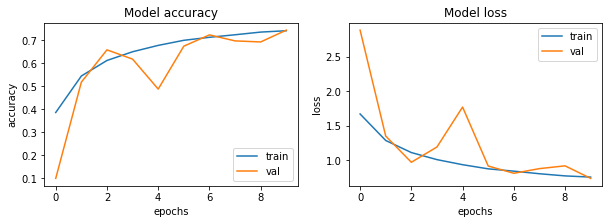

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    print(i, met)
    ax[i].plot(m.history[met])
    ax[i].plot(m.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model().predict(test_images)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('')
print('TEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print(f'Accuracy: {acc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {2*precision*recall/(precision+recall)}')

print('\nTRAIN METRIC ----------------------')
print(f'Train acc: {ihist.history["accuracy"][-1] } ' )

ValueError: multilabel-indicator is not supported